CIS 678 Challenge 3
===================

This notebook uses a C++ backend using Eigen and OpenMP for linear algebra and parallelization. The python module neuralnet is created from this backend uing PyBind11.

The C++ source defines a class NeuralNetwork, which implements the forward and backward propatgation algorithms.


The following have been tested using pytest:
- The model can be constructed without errors
- A forward pass can be run without errors
- A backward pass can be run without errors
- The model can be trained to implement the behavior of an XOR gate

In [21]:
# Import C++ percemtron implementation
import neuralnet as nn
# Import other libraries
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load training data
DATA = np.genfromtxt('data/train.csv', delimiter=',', skip_header=1)

# Define a function to format and save data for submission
def save_result(data, filename):
    if not ('.csv' in filename):
            filename += '.csv'

    # Format results in the format kaggle wants 
    results_out = [["\"id\"","\"expected\""]]
    for i in range(0, len(data)):
        results_out.append([f"\"stock_{i+1}\"", f"\"{int(data[i])}\""])


    np.savetxt(F"results/{filename}", results_out, delimiter=',', fmt="%s")


Transform Data

In [23]:
# for col in range(DATA.shape[1]):
#     DATA[:,col] /= np.max(DATA[:,col])


Basic Perceptron Based Prediction
---------------------------------
Format the data into slices of 10 days, where the first 9 are used for training and the 10th is used to test the output. Perform backpropagation over this data, then run a forward pass on the final slice of 9 days for each stock to make a final prediction. 

In [35]:
# Slice and format training data
train = []
test = []
SIZE = 2

for i in range(0, (999-SIZE), 100):
    for j in range(0, DATA.shape[1]):
        t = list(DATA[i:i+SIZE, j])
        t /= np.max(t)
        # Check if this stock is increasing or decreasing
        if t[-1] > t[0]:
            test.append([1])
        else:
            test.append([0])
        train.append(t)


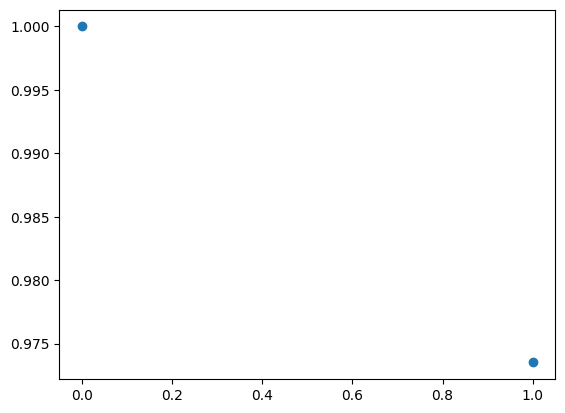

In [36]:
plt.scatter(range(len(train[0])), train[0])

Construct and train the mode.
For now, just guessing at model parmeters

In [39]:
dims = [SIZE] * 2
funcs = [nn.ActivationFunctions.ReLU] * 2

model = nn.NeuralNetwork([SIZE, *dims,  1],    [*funcs, nn.ActivationFunctions.Sigmoid])
errors = model.train(train, test, 1/len(train), 25)

Display a plot of the error as backpropagation progresses, to verify that the model is converging

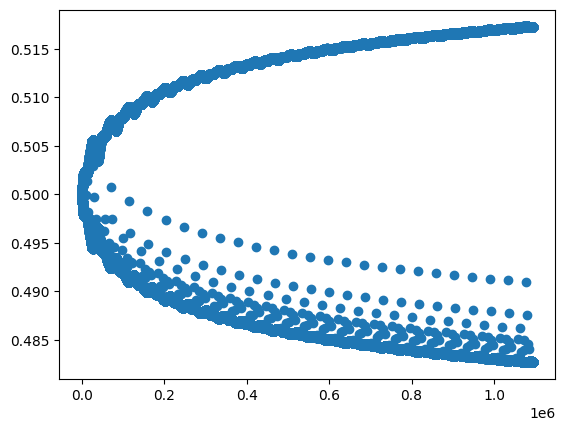

In [40]:
plt.scatter(range(len(errors)), errors)

Now, generate the final results

In [28]:
results = []
for stock in range(0, DATA.shape[1]):
    out = model.forwardPass(list(DATA[-SIZE:-1, stock]) / np.min(DATA[-SIZE:-1, stock]))
    results.append(1 if out[0] > 0.5 else 0)

save_result(results, "basic_perceptron")